In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import os
import pandas as pd 
# application_df = pd.read_csv("../Resources/charity_data.csv")
application_df = pd.read_csv(os.path.join("Resources", "charity_data.csv"))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
app_categories = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [4]:
app_categories

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
application_df[app_categories].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].unique()

array(['T10', 'T3', 'T5', 'T7', 'T4', 'T6', 'T2', 'T9', 'T19', 'T8',
       'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15'], dtype=object)

In [7]:
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

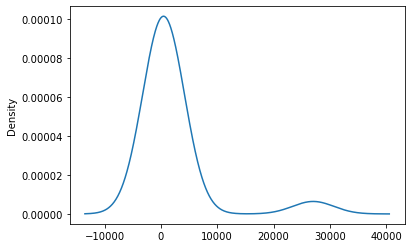

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_df.APPLICATION_TYPE.value_counts().plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
# 1,000 is what I'm starting with...
# change to 1,500 for second run...
replace_application = list(app_type_counts[app_type_counts < 1500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     5720
T4        1542
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_value_counts = application_df.CLASSIFICATION.value_counts()
class_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C6100        1
C2150        1
C2380        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

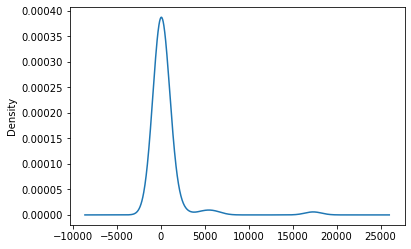

In [11]:
# Visualize the value counts of CLASSIFICATION
application_df.CLASSIFICATION.value_counts().plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
# Started with 1,500, going to 1,800 in this run
replace_class = list(class_value_counts[class_value_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
application_df.ASK_AMT.dtype

dtype('int64')

In [14]:
application_df = application_df.astype({'ASK_AMT':'object'})
size_bins=[0,10000,20000,30000,40000,50000,60000,70000,
           80000,90000,100000,500000,1000000,5000000,10000000,
           100000000,10000000000
          ]
group_names=["5000-10000","10001-20000",'20001-30000',
             '30001-40000','40001-50000','50001-60000',
             '60001-70000','70001-80000','80001-90000',
             '90001-100000','100001-500000','500001-1000000',
             '1000001-5000000','5000001-10000000','10000001-100000000',
             '100000001+'
            ]
application_df["ASK_AMT"]=pd.cut(application_df["ASK_AMT"],size_bins,labels=group_names)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000-10000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,100001-500000,1
2,Other,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000-10000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,5000-10000,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,100001-500000,1


In [15]:
# Look at ASK_AMT value counts for binning
ask_value_counts = application_df.ASK_AMT.value_counts()
ask_value_counts

5000-10000            25947
100001-500000          2304
1000001-5000000         940
10001-20000             789
20001-30000             655
500001-1000000          650
30001-40000             523
40001-50000             431
50001-60000             399
10000001-100000000      311
60001-70000             296
70001-80000             271
80001-90000             251
5000001-10000000        225
90001-100000            206
100000001+              101
Name: ASK_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

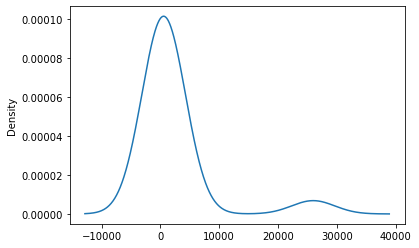

In [16]:
# Visualize
application_df.ASK_AMT.value_counts().plot.density()

In [17]:
replace_ask = list(ask_value_counts[ask_value_counts < 2000].index)

# Replace in dataframe
for cls in replace_ask:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000-10000       25947
Other             6048
100001-500000     2304
Name: ASK_AMT, dtype: int64

In [18]:
# Generate our categorical variable lists
application_df = application_df.astype({'ASK_AMT':'object'})

app_type_cats = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
app_type_cats

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_type_cats]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_type_cats)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100001-500000,ASK_AMT_5000-10000,ASK_AMT_Other
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(app_type_cats,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100001-500000,ASK_AMT_5000-10000,ASK_AMT_Other
0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 52)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Trial B1
# layer1 = 80
# layer2 = 30
# activations: relu, relu, sigmoid
# epochs = 100

# Trial B2
# layer1 = 80
# layer2 = 30
# layer3 = 10
# activations: relu, relu, selu, sigmoid
# epochs = 150

# Trial B3
# layer1 = 40
# layer2 = 30
# layer3 = 10
# activations: relu, selu, selu, tanh
# epochs = 150

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_feature_number = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_feature_number, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="selu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="selu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/AlphabetSoupCharity_Optimization.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])


Epoch 1/150
804/804 [==============================] - 2s 1ms/step - loss: 0.8757 - accuracy: 0.6731
Epoch 2/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6347 - accuracy: 0.7070
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6168 - accuracy: 0.7075
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.6132 - accuracy: 0.7122
Epoch 5/150
782/804 [============================>.] - ETA: 0s - loss: 0.6180 - accuracy: 0.7073
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6171 - accuracy: 0.7079
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5929 - accuracy: 0.7197
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5948 - accuracy: 0.7162
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.7143
Epoch 9/150
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7298
Epoch 60/150
767/804 [===========================>..] - ETA: 0s - loss: 0.5548 - accuracy: 0.7310
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7305
Epoch 61/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7311
Epoch 62/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7303: 0s - loss: 0.5556 - accura
Epoch 63/150
804/804 [==============================] - 1s 991us/step - loss: 0.5579 - accuracy: 0.7301
Epoch 64/150
804/804 [==============================] - 1s 977us/step - loss: 0.5786 - accuracy: 0.7137
Epoch 65/150
789/804 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7301
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
804/804 [===================

Epoch 116/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7255
Epoch 117/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5621 - accuracy: 0.7325
Epoch 118/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5622 - accuracy: 0.7313
Epoch 119/150
804/804 [==============================] - 1s 942us/step - loss: 0.5588 - accuracy: 0.7320
Epoch 120/150
804/804 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7300
Epoch 00120: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7300
Epoch 121/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7324
Epoch 122/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7341
Epoch 123/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7303: 0s - loss

In [27]:
# Trial B1
# 268/268 - 0s - loss: 0.5805 - accuracy: 0.7206
# Loss: 0.5804750919342041, Accuracy: 0.7205830812454224

# Trial B2
# 268/268 - 0s - loss: 0.6011 - accuracy: 0.7217
# Loss: 0.6010944247245789, Accuracy: 0.7217492461204529

# Trial B3
# 268/268 - 0s - loss: 0.5882 - accuracy: 0.7202
# Loss: 0.5882214307785034, Accuracy: 0.7202332615852356

In [28]:
# First trial in this notebook...
# Epoch 100/100
# 804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7355

# Second trial in this notebook
# Epoch 100/100
# 804/804 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7361

# Third trial in this notebook, saved with save_freq=5
# Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
# 800/804 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7350
# Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
# 804/804 [==============================] - 5s 7ms/step - loss: 0.5442 - accuracy: 0.7350

# 4th trial in this notebook
# Set save_freq back to 'epoch'
# Epoch 100/100
# 804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7358
# Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5

# 5th trial in this notebook
# Epoch 100/100
# 786/804 [============================>.] - ETA: 0s - loss: 0.5432 - accuracy: 0.7343
# Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
# 804/804 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7347

# 6th trial in this notebook
# Epoch 100/100
# 790/804 [============================>.] - ETA: 0s - loss: 0.5478 - accuracy: 0.7326
# Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.hdf5
# 804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7328

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5882 - accuracy: 0.7202
Loss: 0.5882214307785034, Accuracy: 0.7202332615852356


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Check a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting random forest model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the random forest model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.720
